<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Random_Forest_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Paper: Comparison of machine learning algorithm for Santander dataset  ###
###############################################################################
#### Integrantes  #############################################################
#### -
#### -
#### -
#### -
###############################################################################

## Paso 1: Importar los dateset enviados por el profesor
import pandas as pd
import numpy as np

# 1.1 Definir las rutas (al estar en la raíz de la carpeta 'Files', la ruta es directa)
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 1.2 Cargar los datos
# El paper menciona que trabajamos con 200,000 registros por archivo
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()
test_df.head()

print(f"¡Carga completada desde el almacenamiento local!")
print(f"Registros cargados: {len(train_df)}")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Paso 2: Pre - procesamiento de la información
# 2.1 Separación de variables predictoras (X) y objetivo (y)
# Basado en la estructura vista en head(), eliminamos ID y Target
X = train_df.drop(['ID_code', 'target'], axis=1)
y = train_df['target']



¡Carga completada desde el almacenamiento local!
Registros cargados: 200000


In [34]:
################################################################################
#### Modelo 1 - Random Forest  #################################################
################################################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 3.1 Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3.2 Configurar el modelo
# Usamos parámetros moderados
model_rf = RandomForestClassifier(
    n_estimators=100,      # Número de árboles
    max_depth=15,          # Limitamos profundidad para no memorizar (overfitting)
    min_samples_leaf=50,   # Evita hojas con muy pocos datos
    class_weight='balanced',
    random_state=42,
    n_jobs=-1              # uso de todos los nucleos
)

# 3.3 Entrenar
print("Entrenando Random Forest... ")
model_rf.fit(X_train, y_train)
print("¡Entrenamiento completado!")

# 3.4 Predicciones
y_pred_rf = model_rf.predict(X_val)
y_proba_rf = model_rf.predict_proba(X_val)[:, 1]


Entrenando Random Forest... 
¡Entrenamiento completado!



--- Reporte de Clasificación: Random Forest ---
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     35980
           1       0.43      0.42      0.43      4020

    accuracy                           0.89     40000
   macro avg       0.68      0.68      0.68     40000
weighted avg       0.89      0.89      0.89     40000

AUC-ROC: 0.8249
Average Precision (AP): 0.4107


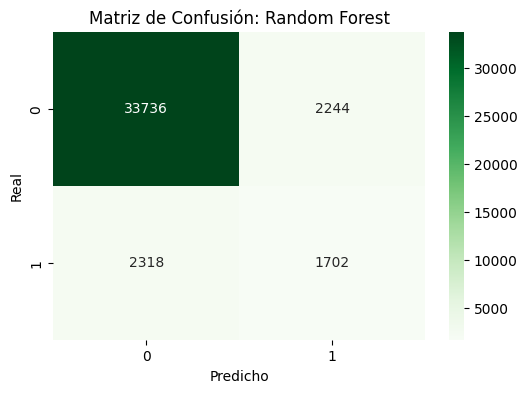

In [35]:
# Reporte de métricas
print("\n--- Reporte de Clasificación: Random Forest ---")
print(classification_report(y_val, y_pred_rf))

# AUC-ROC
auc_rf = roc_auc_score(y_val, y_proba_rf)
ap_rf = average_precision_score(y_val, y_proba_rf)
print(f"AUC-ROC: {auc_rf:.4f}")
print(f"Average Precision (AP): {ap_rf:.4f}")

# Matriz de Confusión
plt.figure(figsize=(6, 4))
import seaborn as sns
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión: Random Forest')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

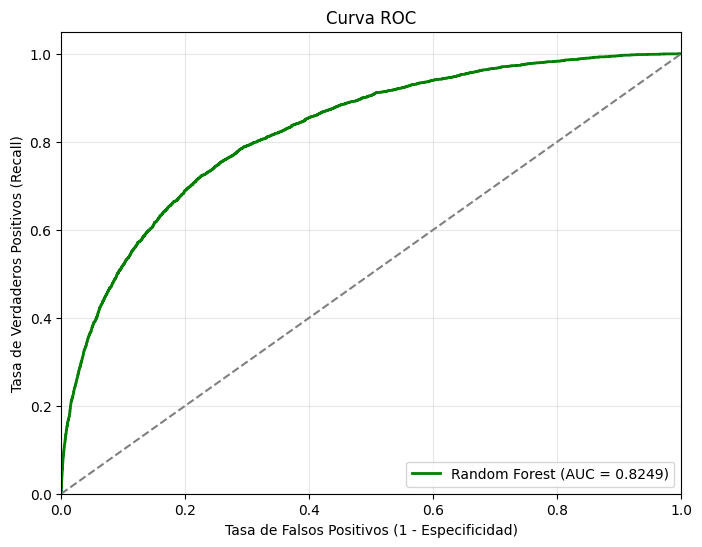

In [36]:
from sklearn.metrics import roc_curve, auc

# Calculamos la curva para el RF
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Suponiendo que guardaste las probabilidades de tu mejor Logística (L2)
# fpr_log, tpr_log, _ = roc_curve(y_val, y_proba_logistica)
# roc_auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
# plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Reg. Logística L2 (AUC = {roc_auc_log:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [46]:
y_scores = model_rf.predict_proba(X_val)[:, 1]


In [47]:
import numpy as np

np.percentile(y_scores, [50, 75, 90, 95, 97, 99, 99.5, 99.9])


array([0.38539227, 0.44352061, 0.49938173, 0.53348225, 0.55680491,
       0.5971395 , 0.61738182, 0.65778664])

In [48]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_scores)


In [49]:
import pandas as pd

pr_df = pd.DataFrame({
    "threshold": thresholds,
    "precision": precision[:-1],
    "recall": recall[:-1]
})

pr_df.head()


,threshold,precision,recall
0,0.222359,0.100500,1.0
1,0.222655,0.100503,1.0
2,0.224577,0.100505,1.0
3,0.225810,0.100508,1.0
4,0.226008,0.100510,1.0


In [50]:
candidatos = pr_df[
    (pr_df["recall"] >= 0.70) &
    (pr_df["precision"] >= 0.25)
].sort_values("recall", ascending=False)

candidatos.head(10)


,threshold,precision,recall
28016,0.430065,0.250000,0.745274
28017,0.430102,0.250021,0.745274
28018,0.430103,0.250042,0.745274
28019,0.430104,0.250063,0.745274
28020,0.430108,0.250083,0.745274
28024,0.430164,0.250167,0.745274
28026,0.430171,0.250209,0.745274
28023,0.430163,0.250146,0.745274
28021,0.430156,0.250104,0.745274
28022,0.430157,0.250125,0.745274


--- Reporte de Clasificación (Umbral Ajustado: 0.43) ---
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     35980
           1       0.25      0.75      0.37      4020

    accuracy                           0.75     40000
   macro avg       0.61      0.75      0.61     40000
weighted avg       0.89      0.75      0.80     40000



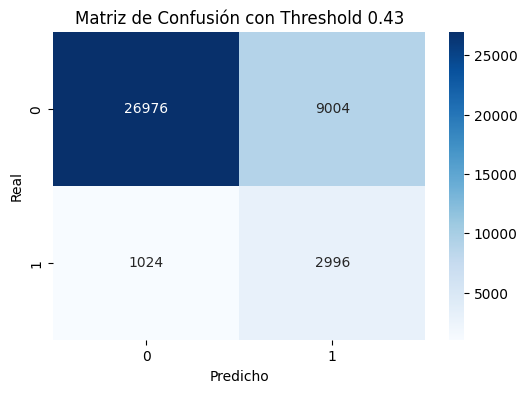

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Obtener las probabilidades de la clase positiva (si ya las tienes de la corrida anterior)
# y_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# 2. Definir tu nuevo umbral "óptimo"
nuevo_threshold = 0.43

# 3. Aplicar el umbral manualmente
y_pred_nuevo = (y_proba_rf >= nuevo_threshold).astype(int)

# 4. Mostrar los resultados comparativos
print(f"--- Reporte de Clasificación (Umbral Ajustado: {nuevo_threshold}) ---")
print(classification_report(y_val, y_pred_nuevo))

# Matriz de Confusión para ver el impacto real
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_val, y_pred_nuevo), annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión con Threshold {nuevo_threshold}')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

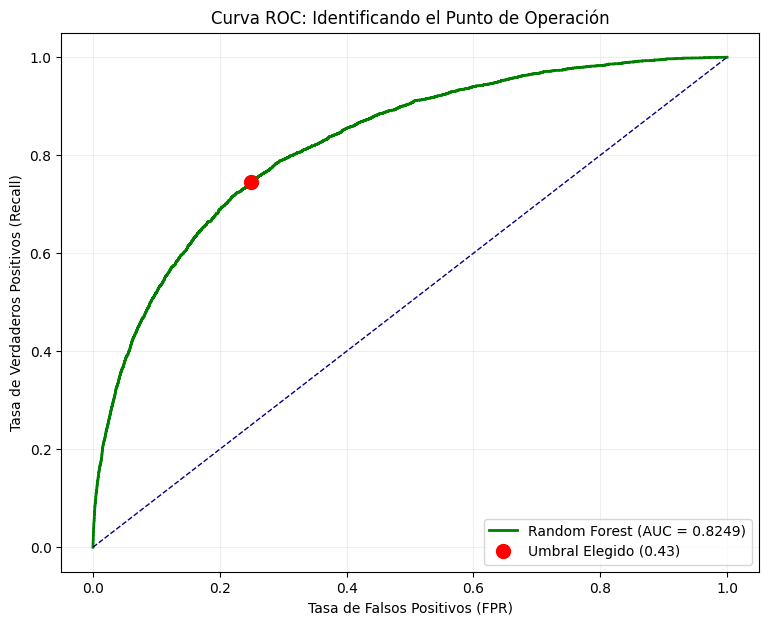

In [52]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Calculamos los puntos de la curva para el RF
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 2. Graficamos
plt.figure(figsize=(9, 7))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Dibujamos el "Punto de Operación" que encontraste (Threshold 0.43)
# Buscamos el índice más cercano a tu umbral en el array de thresholds
idx = np.argmin(np.abs(thresholds_rf - 0.43))
plt.plot(fpr_rf[idx], tpr_rf[idx], 'ro', markersize=10, label=f'Umbral Elegido (0.43)')

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (Recall)')
plt.title('Curva ROC: Identificando el Punto de Operación')
plt.legend(loc="lower right")
plt.grid(alpha=0.2)
plt.show()